In [69]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.cross_validation import cross_val_score 
import matplotlib.pyplot as plt
import math
%matplotlib inline

# Classification

Read in the data

In [28]:
data_columns = ['Sample code number', 'Clump Thickness','Uniformity of Cell Size', 'Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses', 'Class']

data = pd.read_csv('cancer.csv', header = None, names = data_columns, index_col = 'Sample code number')

Label data

In [12]:
print data_columns

['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']


Is there anything wrong with our data?

In [19]:
data.describe()
data['Clump Thickness'].unique()
data['Uniformity of Cell Size'].unique()

#Yes! Data is in string format, 'Bare Nuclei' is missing values

array([ 1,  4,  8, 10,  2,  3,  7,  5,  6,  9])

Convert to integers using convert_objects

In [29]:
data = data.convert_objects(convert_numeric = True)
data['Clump Thickness'].unique()

array([ 5,  3,  6,  4,  8,  1,  2,  7, 10,  9])

Impute missing data with the columns' mean

In [30]:
print data.loc[1057013]

data.fillna(data.mean().round(), inplace = True)

print data.loc[1057013]

Clump Thickness                 8
Uniformity of Cell Size         4
Uniformity of Cell Shape        5
Marginal Adhesion               1
Single Epithelial Cell Size     2
Bare Nuclei                   NaN
Bland Chromatin                 7
Normal Nucleoli                 3
Mitoses                         1
Class                           4
Name: 1057013, dtype: float64
Clump Thickness                8
Uniformity of Cell Size        4
Uniformity of Cell Shape       5
Marginal Adhesion              1
Single Epithelial Cell Size    2
Bare Nuclei                    4
Bland Chromatin                7
Normal Nucleoli                3
Mitoses                        1
Class                          4
Name: 1057013, dtype: float64


Let's check out some histograms

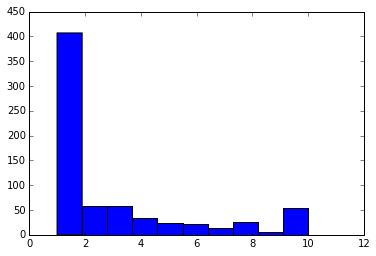

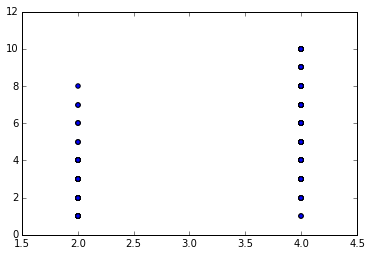

In [38]:
plt.hist([data['Marginal Adhesion']])
plt.figure()
plt.scatter(data['Class'], data['Uniformity of Cell Shape'])

Split the data into train and test using train_test_split

In [40]:
feature_labels = ['Uniformity of Cell Shape','Mitoses']
target = data['Class'].values
features = data[feature_labels].values

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.33, random_state = 42)

Create a KNeighborsClassifier with 3 neighbors, and fit with our training data

In [51]:
nbrs = KNeighborsClassifier(n_neighbors = 3)
nbrs.fit(features_train, target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=3, p=2, weights='uniform')

Using cross_val_score, test our model against all of the features and labels. How did it do?

In [52]:
r2 = cross_val_score(nbrs, features, target)
r2.mean()

0.92278894484015106

# Choose a number of neighbors


In [70]:
r2mean_list = []
i_list = []
for i in range(1,10):
    i_list.append(i)
    nbrs = KNeighborsClassifier(n_neighbors = i)
    nbrs.fit(features_train, target_train)
    r2 = cross_val_score(nbrs, features, target)
    r2mean_list.append(r2.mean())
    

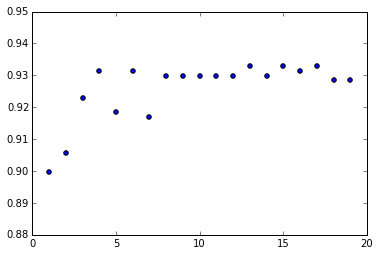

In [60]:
plt.scatter(i_list,r2mean_list)

The code below does not work yet. Trying to iterate over different pairs of features.

In [ ]:
feature_labels = ['Uniformity of Cell Shape','Mitoses']
target = data['Class'].values
features = data[feature_labels].values

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.33, random_state = 42)

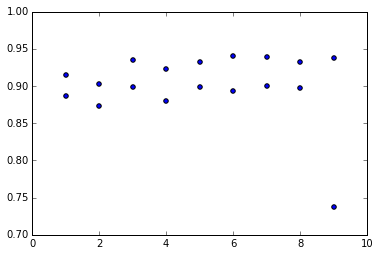

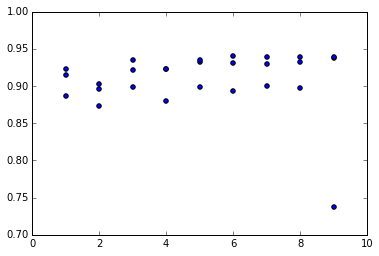

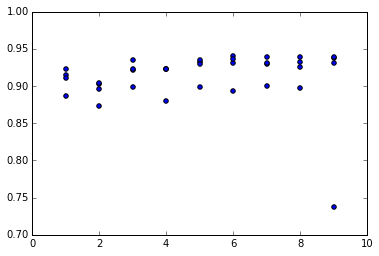

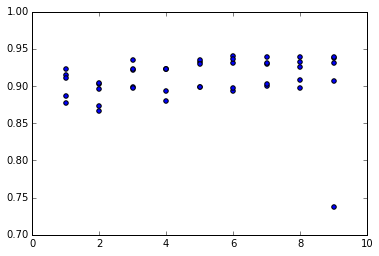

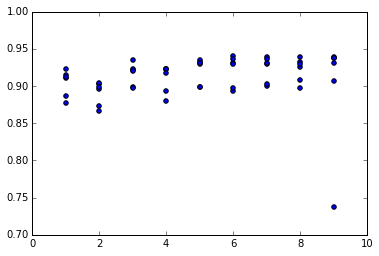

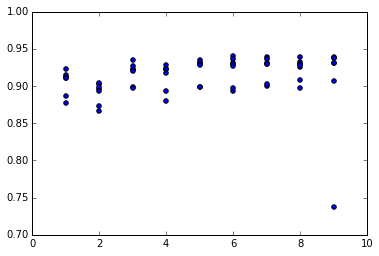

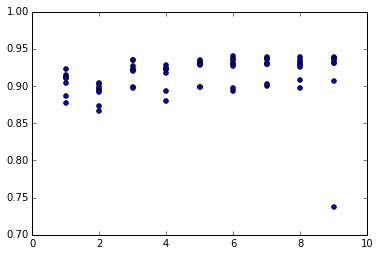

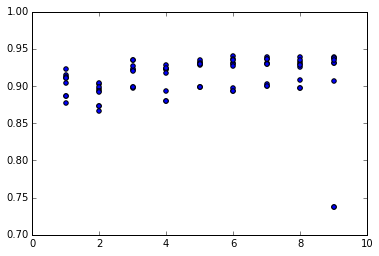

In [71]:
for i in range(1,len(data_columns)-2):
    feature_labels = [data_columns[i], data_columns[i+1]]
    target = data['Class'].values
    features = data[feature_labels].values
    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.33, random_state = 42)
    for i in range(1,10):
        i_list.append(i)
        nbrs = KNeighborsClassifier(n_neighbors = i)
        nbrs.fit(features_train, target_train)
        r2 = cross_val_score(nbrs, features, target)
        r2mean_list.append(r2.mean())
    plt.figure()
    plt.scatter(i_list,r2mean_list)